In [2]:
import sys
sys.path.insert(0, '../model')

import pickle as pkl
import tools
from tools import tools
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import scipy.stats

import os
import matplotlib
matplotlib.rcParams['figure.dpi'] = 150
plt.rcParams.update({"text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

## Bootstrap

In [422]:
fnames = {'IGF-1': 'igf1_sinarm-igf1-range',
         'Urate': 'urate_sinarm-urate-range',
         'Testosterone (Male)': 'male_testosterone_sinarm-maletest-range',
         'Testosterone (Female)': 'female_testosterone_sinarm-femaletest-range'}


num = 100
row = 0

pheno = 'Testosterone (Male)'
pheno = 'Urate'
pheno = 'IGF-1'
# pheno = 'Testosterone (Female)'

data = '%s_top%d' %(fnames[pheno], num)
n_fold = 500
res = np.zeros(n_fold)
weights = np.zeros(n_fold)
weights = list()
weird_res = list()
omega_effect = list()

for p in range(n_fold): 
    # fname = f'./pkl/bootstrap-min-iter/{data}/bootstrap{p:02}.pkl'
    fname = f'./pkl/bootstrap/{data}/bootstrap_{p}.pkl'
    # fname = f'./pkl/bootstrap/{data}/bootstrap_perm_{p}.pkl'
    # fname = f'./pkl/bootstrap/{data}/bootstrap_rint_{p}.pkl'
    if not os.path.isfile(fname):
        print('missing: %s' %fname)
        continue
    
    with open(fname, 'rb') as f:
        ce_fit = pkl.load(f)
        am_fit = pkl.load(f)
        if not ce_fit.conv: continue
        if ce_fit.weights[0,1] > 2: weird_res.append((ce_fit, am_fit))

    weights.append(ce_fit.weights[0][1])
    # omega_effect.append(np.linalg.norm(ce_fit.omega))
    omega_effect.append(ce_fit.weights[0, 1] * np.linalg.norm(ce_fit.pathways[:, 0] * ce_fit.pathways[:, 1]))
    # weights[p] = ce_fit.weights[0][1]
weights = np.array(weights)
omega_effect = np.array(omega_effect)
# scipy.stats.ttest_1samp(res, 0, alternative='greater')

missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_31.pkl
missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_36.pkl
missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_47.pkl
missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_50.pkl
missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_62.pkl
missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_64.pkl
missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_78.pkl
missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_108.pkl
missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_134.pkl
missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_137.pkl
missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_141.pkl
missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_146.pkl
missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_166.pkl
missing: ./pkl/bootstrap/igf1_sinarm-igf1-range_top100/boo

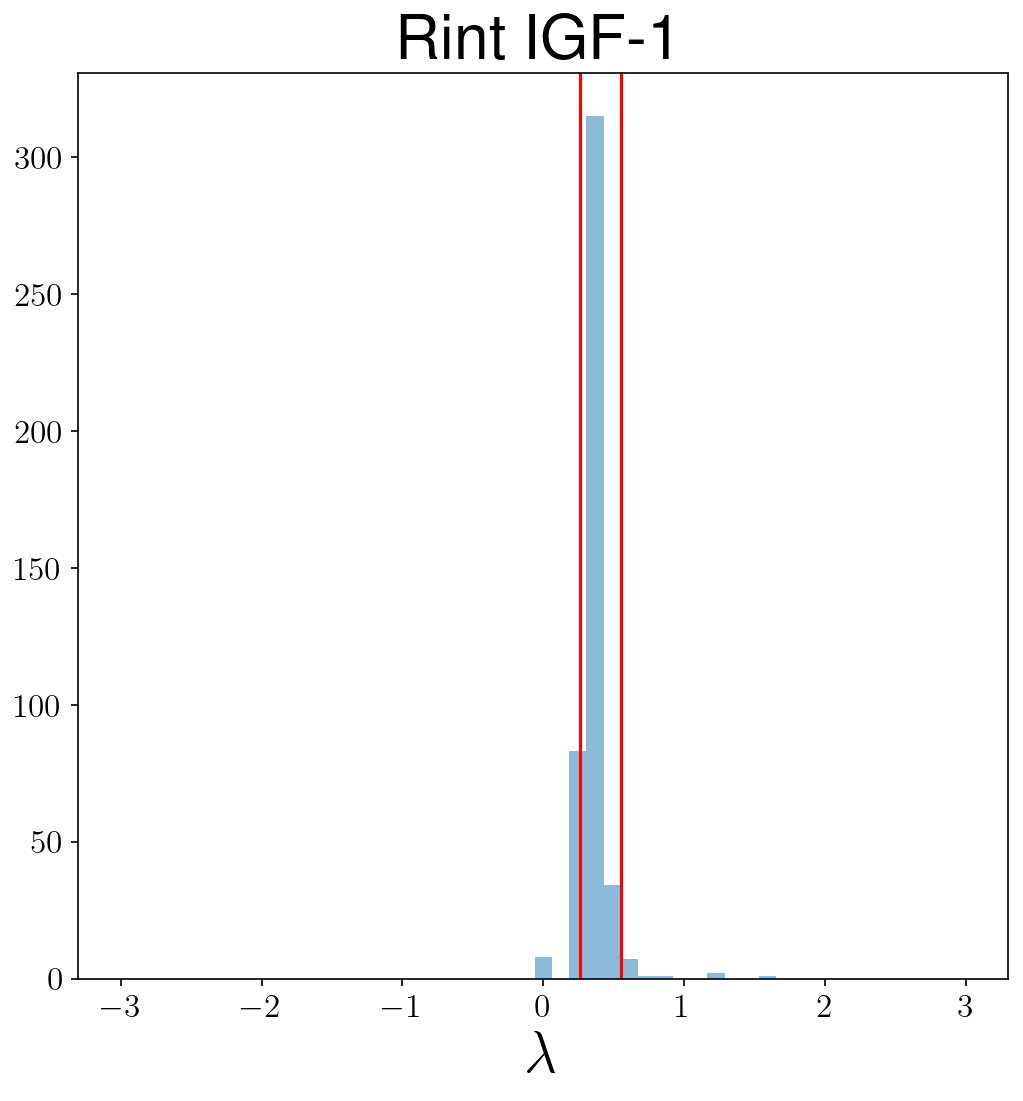

In [191]:

# bins = np.linspace(0, 1, 100)
bins = np.linspace(-1, 1, 100)
bins = np.linspace(-3, 3, 50)
alpha = 0.5
# bins = None

fig, ax = plt.subplots(figsize = (8, 8))
ax.hist(weights, bins = bins, alpha = alpha)
ax.set_title(pheno, fontsize = 30)
ax.set_title('Rint ' + pheno, fontsize = 30)
ax.axvline(x = np.quantile(weights, 0.025), color = 'red')
ax.axvline(x = np.quantile(weights, 0.975), color = 'red')
ax.set_xlabel(r'$\lambda$', fontsize = 28)
ax.tick_params(axis='both', labelsize=16)

# plt.axvline(x = 0, color ='black')
plt.show()


In [192]:
print((np.abs(weights) > 3).sum())
len(weights)

0


452

## Bootstrap Grid

./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_499.pkl 476
./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_rint_499.pkl 479
./pkl/bootstrap/igf1_sinarm-igf1-range_top100/bootstrap_perm_499.pkl 483
./pkl/bootstrap/urate_sinarm-urate-range_top100/bootstrap_499.pkl 493
./pkl/bootstrap/urate_sinarm-urate-range_top100/bootstrap_rint_499.pkl 500
./pkl/bootstrap/urate_sinarm-urate-range_top100/bootstrap_perm_499.pkl 449
./pkl/bootstrap/male_testosterone_sinarm-maletest-range_top100/bootstrap_499.pkl 494
./pkl/bootstrap/male_testosterone_sinarm-maletest-range_top100/bootstrap_rint_499.pkl 489
./pkl/bootstrap/male_testosterone_sinarm-maletest-range_top100/bootstrap_perm_499.pkl 494
./pkl/bootstrap/female_testosterone_sinarm-femaletest-range_top100/bootstrap_499.pkl 498
./pkl/bootstrap/female_testosterone_sinarm-femaletest-range_top100/bootstrap_rint_499.pkl 495
./pkl/bootstrap/female_testosterone_sinarm-femaletest-range_top100/bootstrap_perm_499.pkl 498


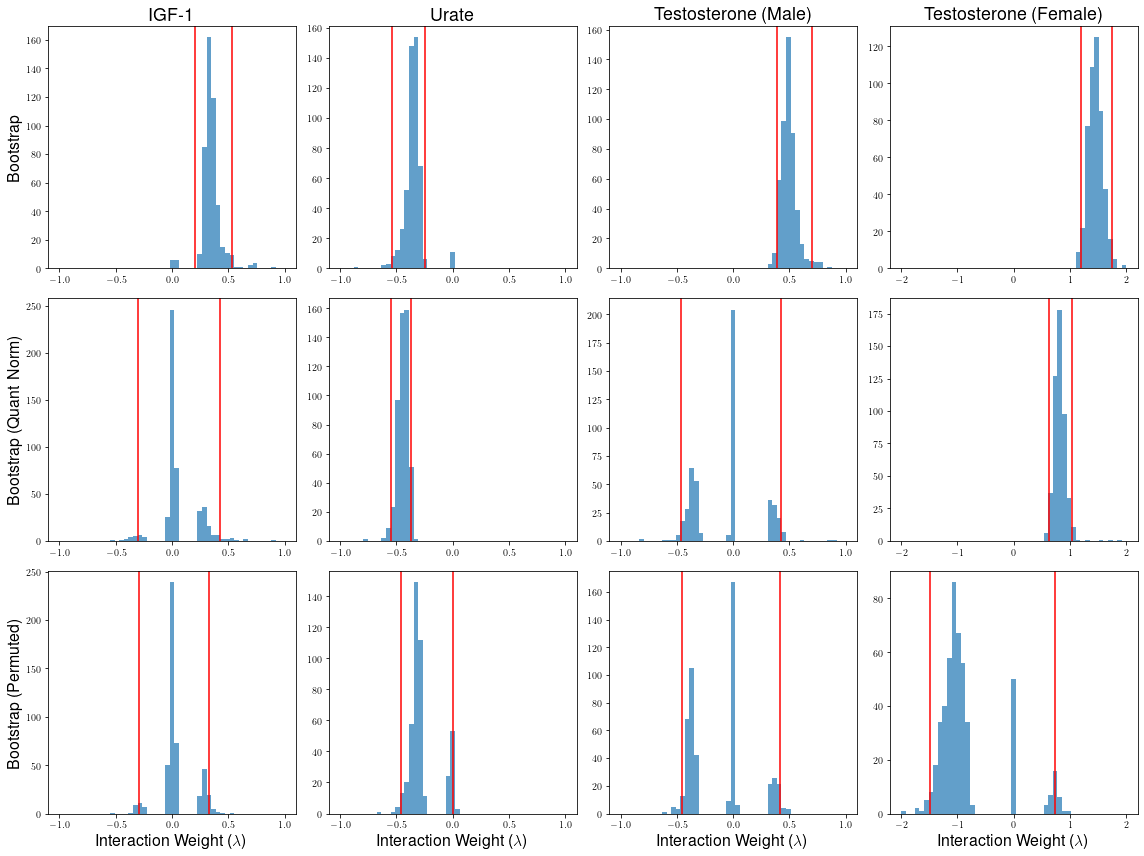

In [19]:
fnames = {'IGF-1': 'igf1_sinarm-igf1-range',
         'Urate': 'urate_sinarm-urate-range',
         'Testosterone (Male)': 'male_testosterone_sinarm-maletest-range',
         'Testosterone (Female)': 'female_testosterone_sinarm-femaletest-range'}

num = 100
n_bs = 500

fig, ax = plt.subplots(nrows=3, ncols=4, figsize = (16, 12), sharex=False)
bins = [
    np.linspace(-1, 1, 50),
    np.linspace(-1, 1, 50),
    np.linspace(-1, 1, 50),
    np.linspace(-2, 2, 50),
]
for j, pheno in enumerate(fnames):
    data = '%s_top%d' %(fnames[pheno], num)
    
    for i, suffix in enumerate(['', 'rint_', 'perm_']):
        res = np.zeros(n_fold)
        weights = np.zeros(n_fold)
        weights = list()
        weird_res = list()
        omega_effect = list()

        for p in range(n_bs): 
            fname = f'./pkl/bootstrap/{data}/bootstrap_{suffix}{p}.pkl'
            if not os.path.isfile(fname):
                # print('missing: %s' %fname)
                continue
            
            with open(fname, 'rb') as f:
                ce_fit = pkl.load(f)
                am_fit = pkl.load(f)
                if not ce_fit.conv: continue
                if ce_fit.weights[0,1] > 2: weird_res.append((ce_fit, am_fit))

            weights.append(ce_fit.weights[0][1])
            omega_effect.append(np.linalg.norm(ce_fit.omega))
            # omega_effect.append(ce_fit.weights[0, 1] * np.linalg.norm(ce_fit.pathways[:, 0] * ce_fit.pathways[:, 1]))
        weights = np.array(weights)
        print(f'{fname} {(weights.shape[0])}')
        omega_effect = np.array(omega_effect)

        ax[i, j].hist(weights, bins = bins[j], alpha = alpha)
        ax[i, j].axvline(x = np.quantile(weights, 0.025), color = 'red')
        ax[i, j].axvline(x = np.quantile(weights, 0.975), color = 'red')
        # ax[i, j].axvline(x = 0, color = 'black')
        ax[0, j].set_title(pheno, fontsize=18)
        ax[-1, j].set_xlabel(f'Interaction Weight ($\lambda$)', fontsize=16)

ax[0, 0].set_ylabel('Bootstrap', fontsize=16)
ax[1, 0].set_ylabel('Bootstrap (Quant Norm)', fontsize=16)
ax[2, 0].set_ylabel('Bootstrap (Permuted)', fontsize=16)
# fig.savefig('./plots/bootstrap.png', dpi=300)
fig.tight_layout()

In [430]:
np.quantile(omega_effect, 0.5)

0.03457465084443989

## EF1 vs EF2

In [4]:
import pandas as pd
import scipy.stats
def enrich(pathway, ref, nsnps, top_snps):
    res = dict()
    for k,v in pathway.items():
        res[k] = 1 -scipy.stats.hypergeom.cdf(v-1, nsnps, ref[k], top_snps)
    return pd.Series(res, dtype='float64')


def get_efa_df(gwas_file, ann_file, efa_file, snp_file, used_file):
    df = pd.read_csv(gwas_file, sep='\t')
    df = df[df['CHROM'] != 'X']
    df = df[df['CHROM'] != 'Y']
    df = df.sort_values(by = 'P', kind='stable')
    df['IDX'] = df['CHROM'].astype('str') + ':' + df['POS'].astype('str') + '_' + df['REF'] + '_' + df['A1']

    used = pd.read_csv(used_file, header=None, sep='\s+')
    df = used.merge(df, left_on=3, right_on='IDX')

    df['CHROM'] = df['CHROM'].astype('int')
    df = df.sort_values(by='POS')
    df = df.sort_values(by='CHROM', kind='stable').reset_index()
    df = df.loc[:,['CHROM', 'POS', 'REF', 'A1', 'P', 'BETA', 'IDX']]

    with open(efa_file, 'rb') as f:
        efa = pkl.load(f)

    # efa.pathways -= efa.beta/2
    df['U1_orig'] = efa.pathways[:,0]
    df['U2_orig'] = efa.pathways[:,1]
    efa.pathways *= efa.beta/np.abs(efa.beta)
    df['U1'] = efa.pathways[:,0]
    df['U2'] = efa.pathways[:,1]
    df['U1_res'] = efa.pathways[:,0] - (efa.pathways[:,0] + efa.pathways[:,1])/2
    df['U2_res'] = efa.pathways[:,1] - (efa.pathways[:,0] + efa.pathways[:,1])/2


    snps = pd.read_csv(snp_file, header=None)
    df['SNP'] = snps
    df['LAMBDA'] = efa.weights[0, 1]

    ann = pd.read_csv(ann_file, sep='\t', header=None, na_values='.')
    ann = ann.iloc[:,[3, 7, 8, 9]]
    ann.columns = ['IDX', 'GENE', 'PATHWAY', 'DIST']
    ann = ann.drop_duplicates(subset = ['IDX', 'PATHWAY'])
    ann = ann.merge(df, left_on='IDX', right_on='IDX').loc[:,['IDX', 'GENE', 'PATHWAY', 'DIST',]]

    # ann = ann.sort_values(by = 'P')
    # ann = ann.drop_duplicates(subset= ['GENE', 'PATHWAY'])

    df = df.merge(ann, left_on='IDX', right_on='IDX')
    nsnps = len(df['IDX'].unique())
    return df

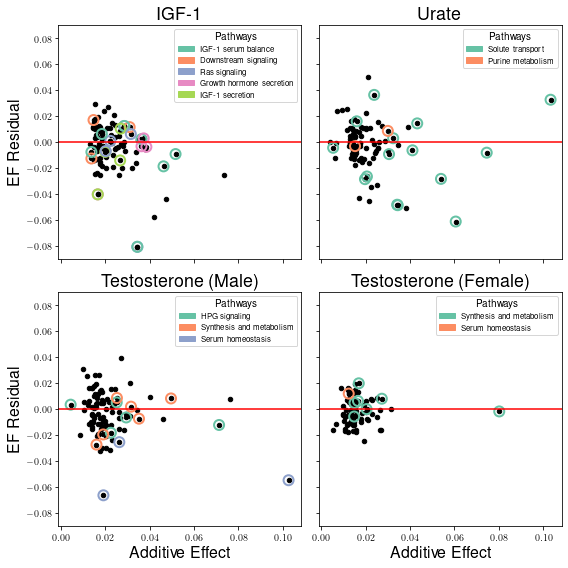

In [5]:
fnames = {
    'IGF-1': {
        'gwas_file':'./snps/igf1.txt',
        'ann_file' : './pathways/igf1.hits.closest.core.txt',
        'efa_file' : './pkl/igf1_sinarm-igf1-range_top100.pkl',
        'snp_file' : './snps/igf1_sinarm-igf1-range_top100.snps',
        'used_file': './snps/sinarm-igf1-range_top100.txt',
    },
    'Urate': {
        'gwas_file': './snps/urate.txt',
        'ann_file' : './pathways/urate.hits.closest.core.txt',
        'efa_file' : './pkl/urate_sinarm-urate-range_top100.pkl',
        'snp_file' : './snps/urate_sinarm-urate-range_top100.snps',
        'used_file': './snps/sinarm-urate-range_top100.txt',
    },
    'Testosterone (Male)': {
        'gwas_file': './snps/maletest.txt',
        'ann_file' : './pathways/testosterone.males.hits.closest.core.txt',
        'efa_file' : './pkl/male_testosterone_sinarm-maletest-range_top100.pkl',
        'snp_file' : './snps/male_testosterone_sinarm-maletest-range_top100.snps',
        'used_file': './snps/sinarm-maletest-range_top100.txt',
    },
    'Testosterone (Female)': {
        'gwas_file': './snps/femaletest.txt',
        'ann_file' : './pathways/testosterone.females.hits.closest.core.txt',
        'efa_file' : './pkl/female_testosterone_sinarm-femaletest-range_top100.pkl',
        'snp_file' : './snps/female_testosterone_sinarm-femaletest-range_top100.snps',
        'used_file': './snps/sinarm-femaletest-range_top100.txt',
    }
}

import matplotlib.patches

num = 100
alpha = 0.7
s = 20
fig, ax = plt.subplots(2, 2, figsize = (8, 8), sharex=True, sharey=True)

for idx,pheno in enumerate(fnames):
    i = idx // 2
    j = idx % 2
    df = get_efa_df(**fnames[pheno])

    cmap = plt.cm.Set2
    ann = df[df.DIST < 1e5].replace('No pathway', np.nan).dropna()
    ann = ann.replace('Solute_transport', 'Solute transport')
    ann = ann.replace('Purine_metabolism', 'Purine metabolism')
    levels, categories = pd.factorize(ann.PATHWAY)
    colors = [cmap(i) for i in levels]
    handles = [matplotlib.patches.Patch(color=cmap(i), label=c) for i, c in enumerate(categories)]

    # ax[i, j].plot(
    #     df[df.DIST < 1e5].replace('No pathway', np.nan).dropna().U1, 
    #     df[df.DIST < 1e5].replace('No pathway', np.nan).dropna().U2,
    #     marker = 'o',
    #     alpha = 1, 
    #     s=100,
    #     linewidth=1.5,
    #     facecolors='none',
    #     c = colors
    # )

    ax[i, j].scatter(
        (df.U1 + df.U2), 
        df.U1_res,
        color='black', 
        edgecolors='black', 
        alpha = 1, 
        s=s,
        label = 'Epistasis Factors'
    )
    
    # ax[i, j].scatter(
    #     (df['U1'] + df['U2'])/2, 
    #     (df['U1'] + df['U2'])/2, 
    #     color='red',
    #     edgecolors='black',
    #     alpha = alpha,
    #     s=s,
    #     label='Additive Effects'
    # )

    
    ax[i, j].scatter(
        ann.U1 + ann.U2,  
        ann.U1_res,
        marker = 'o',
        facecolors = 'none',
        edgecolors = colors,
        linewidth=2,
        s = 100
    )
    ax[i, j].set_title(pheno, fontsize = 18)
    # ax[i, j].legend(frameon=True, framealpha=1)
    ax[i, j].legend(handles=handles, title='Pathways', fontsize = 8)
    ax[i, j].axhline(0, color = 'red')
    ax[i, j].set_ylim(-.09, .09)
    # ax[i, j].set_xlim(-.05, .18)
ax[0, 0].set_ylabel('EF Residual', fontsize = 16)
ax[1, 0].set_ylabel('EF Residual', fontsize = 16)
ax[1, 0].set_xlabel('Additive Effect', fontsize = 16)
ax[1, 1].set_xlabel('Additive Effect', fontsize = 16)

fig.tight_layout()
# plt.savefig('./plots/ef_residuals.png', dpi=300)
plt.show()

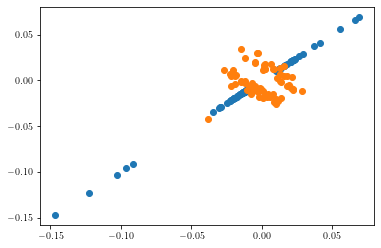

In [11]:
plt.scatter(df['BETA'], df['BETA'])
plt.scatter(df['U1_orig'], df['U2_orig'])

## EF Plot Flat

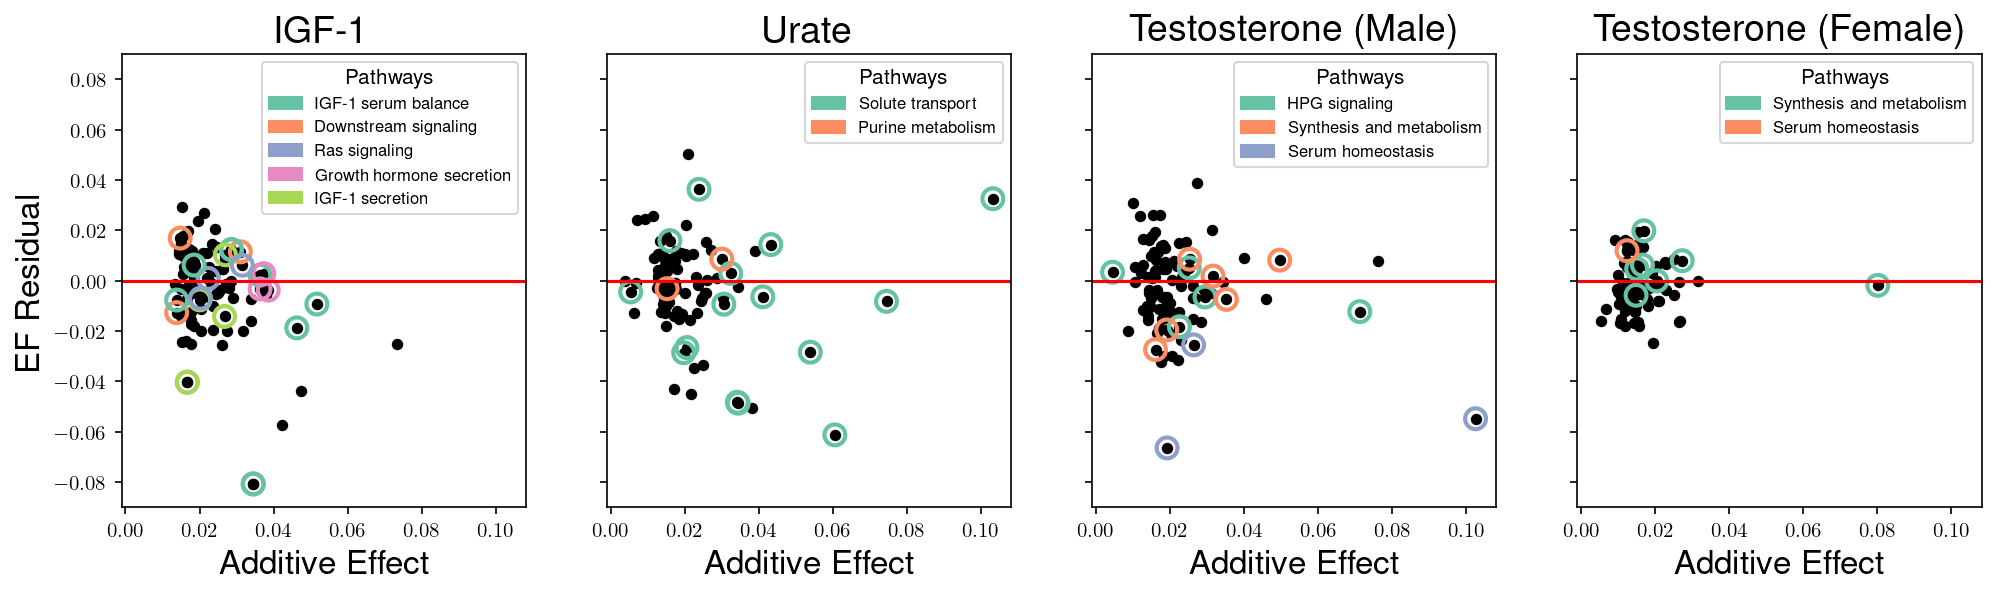

In [426]:
fnames = {
    'IGF-1': {
        'gwas_file':'./snps/igf1.txt',
        'ann_file' : './pathways/igf1.hits.closest.core.txt',
        'efa_file' : './pkl/igf1_sinarm-igf1-range_top100.pkl',
        'snp_file' : './snps/igf1_sinarm-igf1-range_top100.snps',
        'used_file': './snps/sinarm-igf1-range_top100.txt',
    },
    'Urate': {
        'gwas_file': './snps/urate.txt',
        'ann_file' : './pathways/urate.hits.closest.core.txt',
        'efa_file' : './pkl/urate_sinarm-urate-range_top100.pkl',
        'snp_file' : './snps/urate_sinarm-urate-range_top100.snps',
        'used_file': './snps/sinarm-urate-range_top100.txt',
    },
    'Testosterone (Male)': {
        'gwas_file': './snps/maletest.txt',
        'ann_file' : './pathways/testosterone.males.hits.closest.core.txt',
        'efa_file' : './pkl/male_testosterone_sinarm-maletest-range_top100.pkl',
        'snp_file' : './snps/male_testosterone_sinarm-maletest-range_top100.snps',
        'used_file': './snps/sinarm-maletest-range_top100.txt',
    },
    'Testosterone (Female)': {
        'gwas_file': './snps/femaletest.txt',
        'ann_file' : './pathways/testosterone.females.hits.closest.core.txt',
        'efa_file' : './pkl/female_testosterone_sinarm-femaletest-range_top100.pkl',
        'snp_file' : './snps/female_testosterone_sinarm-femaletest-range_top100.snps',
        'used_file': './snps/sinarm-femaletest-range_top100.txt',
    }
}

import matplotlib.patches

num = 100
alpha = 0.7
s = 20
fig, ax = plt.subplots(1, 4, figsize = (16, 4), sharex=True, sharey=True)

for idx,pheno in enumerate(fnames):
    df = get_efa_df(**fnames[pheno])

    cmap = plt.cm.Set2
    ann = df[df.DIST < 1e5].replace('No pathway', np.nan).dropna()
    ann = ann.replace('Solute_transport', 'Solute transport')
    ann = ann.replace('Purine_metabolism', 'Purine metabolism')
    levels, categories = pd.factorize(ann.PATHWAY)
    colors = [cmap(i) for i in levels]
    handles = [matplotlib.patches.Patch(color=cmap(i), label=c) for i, c in enumerate(categories)]

    ax[idx].scatter(
        (df.U1 + df.U2), 
        df.U1_res,
        color='black', 
        edgecolors='black', 
        alpha = 1, 
        s=s,
        label = 'Epistasis Factors'
    )
    
    ax[idx].scatter(
        ann.U1 + ann.U2,  
        ann.U1_res,
        marker = 'o',
        facecolors = 'none',
        edgecolors = colors,
        linewidth=2,
        s = 100
    )
    ax[idx].set_title(pheno, fontsize = 18)
    ax[idx].legend(handles=handles, title='Pathways', fontsize = 8)
    ax[idx].axhline(0, color = 'red')
    ax[idx].set_ylim(-.09, .09)
    ax[idx].set_xlabel('Additive Effect', fontsize = 16)
ax[0].set_ylabel('EF Residual', fontsize = 16)

plt.savefig('./plots/ef_residuals_flat.png', dpi=300)
plt.show()